<a href="https://colab.research.google.com/github/SamuGalli/DIQ/blob/main/DIQproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DATA QUALITY ASSESSMENT**

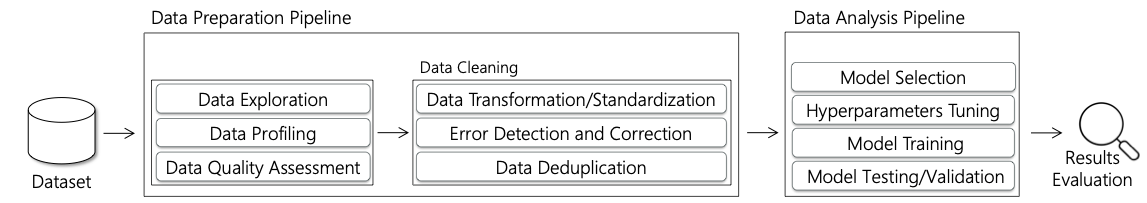

Import libraries:

In [99]:
import pandas as pd
import numpy as np
from datetime import datetime
import re


Import data:

In [4]:
HOTELS = pd.read_csv(
    "https://raw.githubusercontent.com/SamuGalli/DIQ/main/Comune-di-Milano---Strutture-ricettive-alberghiere.csv",
    sep=';',
    encoding='unicode_escape'
)
HOTELS.head()


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo


In [5]:
#number of tuples and columns of the data source
HOTELS.shape

(451, 15)

In [6]:
#show the schema of the data source
HOTELS.columns

Index(['Ubicazione', 'Tipo via', 'Descrizione via', 'Civico', 'Codice via',
       'ZD', 'Camere', 'Camere piano', 'Categoria', 'Insegna', 'Piani totali',
       'Piano piano', 'Posti letto', 'Posti letto per piano',
       'Tipo attività struture extra'],
      dtype='object')

In [7]:
#for each attribute the system shows the type of data. The type of data is defined analyzing the values
HOTELS.dtypes

Ubicazione                       object
Tipo via                         object
Descrizione via                  object
Civico                          float64
Codice via                      float64
ZD                              float64
Camere                          float64
Camere piano                     object
Categoria                        object
Insegna                          object
Piani totali                    float64
Piano piano                      object
Posti letto                     float64
Posti letto per piano            object
Tipo attività struture extra     object
dtype: object

In [8]:
#unique display the list of distinct values in a column
HOTELS['Posti letto'].unique()

array([ 25., 518.,  39.,  98.,  97., 191.,  60.,  67., 180., 100., 147.,
       159., 172., 203.,  81.,  70.,  43.,  46., 167.,  35.,  96., 308.,
       211., 216.,  18.,  15.,  64., 150., 530.,  95.,  41.,  48.,  79.,
        20.,  16.,  56.,  31.,  33.,  24., 244., 189., 725., 623., 441.,
       110., 448., 650.,  23., 208., 395., 212., 305.,  57.,  78.,  38.,
       432.,  22., 158., 125., 259.,  12., 272.,  19.,  45.,  32.,  68.,
       108.,  99., 120.,  21.,   9.,  94.,  93.,  42.,  58.,  17., 163.,
        10., 465., 145., 132.,  36.,  92.,   7., 199.,  27., 111.,  26.,
        73.,  52.,  59., 234.,  50., 245.,  75., 290., 115., 102.,  47.,
       224., 292., 288., 101., 636., 118.,  77., 205., 468., 196., 469.,
       240., 198., 218., 169.,  28., 232., 200., 736., 229.,  82., 242.,
       480.,  14.,  44., 183., 190., 104.,  62.,  76., 487.,  61., 416.,
       262., 133., 266., 206., 439., 252., 160.,  53.,  54.,  34.,  63.,
        40.,  91.,  65., 204., 306.,  69.,  80.,  5

In [9]:
#nunique counts the number of distinct values of a certain column
HOTELS['Ubicazione'].nunique()

438

In [10]:
#nunique counts the number of distinct values of a certain column
HOTELS['Tipo via'].nunique()

8

In [11]:
#nunique counts the number of distinct values of a certain column
HOTELS['Descrizione via'].nunique()

300

In [12]:
#nunique counts the number of distinct values of a certain column
HOTELS['Civico'].nunique()

90

In [13]:
#nunique counts the number of distinct values of a certain column
HOTELS['Codice via'].nunique()

302

In [14]:
#nunique counts the number of distinct values of a certain column
HOTELS['ZD'].nunique()

9

In [15]:
#nunique counts the number of distinct values of a certain column
HOTELS['Camere'].nunique()

148

In [16]:
#nunique counts the number of distinct values of a certain column
HOTELS['Camere piano'].nunique()

207

In [17]:
#nunique counts the number of distinct values of a certain column
HOTELS['Categoria'].nunique()

8

In [18]:
#nunique counts the number of distinct values of a certain column
HOTELS['Insegna'].nunique()

437

In [19]:
#nunique counts the number of distinct values of a certain column
HOTELS['Piani totali'].nunique()

11

In [20]:
#nunique counts the number of distinct values of a certain column
HOTELS['Piano piano'].nunique()

58

In [21]:
#nunique counts the number of distinct values of a certain column
HOTELS['Posti letto'].nunique()

196

In [22]:
#nunique counts the number of distinct values of a certain column
HOTELS['Posti letto per piano'].nunique()

219

In [23]:
#nunique counts the number of distinct values of a certain column
HOTELS['Tipo attività struture extra'].nunique()

3

In [24]:
#value_counts() returns an object containing counts for each unique value
UBICAZIONE_COUNT = HOTELS['Ubicazione'].value_counts()

In [25]:
UBICAZIONE_COUNT.head(100)

Ubicazione
VLE DEI MILLE N. 48 (z.d. 3)             3
VIA LAZZARETTO N. 17 (z.d. 2)            2
VIA FRA' GALGARIO N. 4 (z.d. 7)          2
PZA DELLA REPUBBLICA N. 17 (z.d. 2)      2
VIA AOSTA N. 2 (z.d. 8)                  2
                                        ..
VIA CALVI PIETRO N. 32 (z.d. 4)          1
VIA CANONICA LUIGI N. 38 (z.d. 1)        1
VIA CANONICA LUIGI N. 79 (z.d. 8)        1
VIA CAPPELLINI ALFREDO N. 18 (z.d. 2)    1
VIA CARCANO FILIPPO N. 37 (z.d. 7)       1
Name: count, Length: 100, dtype: int64

In [26]:
VIA_COUNT = HOTELS['Tipo via'].value_counts()
VIA_COUNT

Tipo via
VIA    331
VLE     47
CSO     25
PZA     24
PLE      4
LGO      3
GLL      2
ALZ      1
Name: count, dtype: int64

In [27]:
DESCRIZIONE_COUNT = HOTELS['Descrizione via'].value_counts()
DESCRIZIONE_COUNT

Descrizione via
TORRIANI NAPO             10
PORPORA NICOLA ANTONIO     8
VITRUVIO                   7
BUENOS AIRES               6
DEI MILLE                  5
                          ..
SUZZANI GIOVANNI           1
TESTI FULVIO               1
CONCORDIA                  1
VITTORIO VENETO            1
NAVIGLIO GRANDE            1
Name: count, Length: 300, dtype: int64

In [28]:
CIVICO_COUNT = HOTELS['Civico'].value_counts()
CIVICO_COUNT

Civico
2.0        22
6.0        22
4.0        19
10.0       16
3.0        15
           ..
41609.0     1
120.0       1
139.0       1
300.0       1
89.0        1
Name: count, Length: 90, dtype: int64

In [29]:
CODICE_VIA_COUNT = HOTELS['Codice via'].value_counts()
CODICE_VIA_COUNT

Codice via
2126.0    10
2229.0     8
2134.0     7
2129.0     5
3115.0     5
          ..
1446.0     1
1441.0     1
3116.0     1
2107.0     1
5144.0     1
Name: count, Length: 302, dtype: int64

In [30]:
ZD_COUNT = HOTELS['ZD'].value_counts()
ZD_COUNT

ZD
3.0    111
2.0     75
1.0     69
8.0     44
9.0     34
7.0     32
4.0     30
5.0     25
6.0     17
Name: count, dtype: int64

In [31]:
CAMERE_COUNT = HOTELS['Camere'].value_counts()
CAMERE_COUNT

Camere
10.0     24
14.0     15
11.0     15
15.0     14
13.0     11
         ..
126.0     1
143.0     1
120.0     1
420.0     1
140.0     1
Name: count, Length: 148, dtype: int64

In [32]:
CAMERE_PIANO_COUNT = HOTELS['Camere piano'].value_counts()
CAMERE_PIANO_COUNT

Camere piano
0                   108
8                     4
7                     4
11                    4
13                    4
                   ... 
30;11                 1
33                    1
15;15;15;15;15;9      1
3;6;9;9;9             1
12;7;4                1
Name: count, Length: 207, dtype: int64

In [33]:
CATEGORIA_COUNT = HOTELS['Categoria'].value_counts()
CATEGORIA_COUNT

Categoria
4                 147
3                 135
1                  83
2                  64
5                   7
l                   3
I                   3
5 STELLE LUSSO      2
Name: count, dtype: int64

In [34]:
INSEGNA_COUNT = HOTELS['Insegna'].value_counts()
INSEGNA_COUNT

Insegna
radisson blu hotel milan    2
leonardo da vinci           2
ambrosiana                  2
hotel minerva               2
murillo                     1
                           ..
hotel del sud               1
palazzo delle stelline      1
antica locanda leonardo     1
hotel king                  1
starhotels E.C.H.O.         1
Name: count, Length: 437, dtype: int64

In [35]:
PIANI_TOT_COUNT = HOTELS['Piani totali'].value_counts()
PIANI_TOT_COUNT

Piani totali
3.0     37
4.0     36
5.0     24
7.0     20
6.0     20
1.0     17
2.0     13
8.0     12
9.0      5
17.0     2
10.0     1
Name: count, dtype: int64

In [36]:
PIANO_PIANO_COUNT = HOTELS['Piano piano'].value_counts()
PIANO_PIANO_COUNT

Piano piano
1;2;3;4;5              17
T;1;2                  16
1;2;3;4;5;6            16
1;2;3;4;5;6;7          14
1;2;3;4                14
1;2;3                  11
1                       9
T;1;2;3                 9
R;1;2                   8
1;2                     6
1;2;3;4;5;6;7;8         6
1;2;3;4;5;6;7;8;9;0     5
R;1                     5
R;1;2;3                 5
T;1;2;3;4;5             5
T;1;2;3;4               4
R;1;2;3;4;5             3
;                       2
R;1;2;3;4;5;6;7         2
1;2;3;4;5;6;7;8;9       2
;1;2                    2
T;1;2;3;4;5;6           2
3;4;5;6;7;8;9           1
3;4;5;6;7;8;2;9;0       1
2;3;4;5                 1
1;6;2;5;4;7;3           1
R;2;3                   1
1;2;5;6;7               1
R;1;2;3;4               1
4;5;3;1;2               1
A;1;2;3;4;5;6;7;8;9     1
1;2;3;4;5;A             1
T;1                     1
1;2;3;4;5;8;7           1
2;3;4;5;6;7;8;9         1
R;1;M;2                 1
2;1;R;4;;3              1
R;1;2;M                 1


In [37]:
POSTI_LETTO_COUNT = HOTELS['Posti letto'].value_counts()
POSTI_LETTO_COUNT

Posti letto
25.0     35
20.0     15
24.0     14
23.0     11
32.0      9
         ..
55.0      1
135.0     1
792.0     1
344.0     1
250.0     1
Name: count, Length: 196, dtype: int64

In [38]:
TIPO_ATTIVITA_COUNT = HOTELS['Tipo attività struture extra'].value_counts()
TIPO_ATTIVITA_COUNT

Tipo attività struture extra
Albergo      386
Residence     51
albergo        4
Name: count, dtype: int64

In [39]:
#here we want to inspect how many unique values have the same count
VIA_COUNT.value_counts()

count
331    1
47     1
25     1
24     1
4      1
3      1
2      1
1      1
Name: count, dtype: int64

**DUPLICATION**

Duplication occurs when a real-world entity is stored twice or more in a data source.

*Definition*: A measure of unwanted duplication existing within a data set.

*Evaluation*: Number of duplicates

In [40]:
#duplicated returns a boolean Series denoting the duplicate rows (exact matching)
DUPLICATES = HOTELS.duplicated()
DUPLICATES

0      False
1      False
2      False
3      False
4      False
       ...  
446    False
447    False
448    False
449    False
450    False
Length: 451, dtype: bool

In [41]:
#any shows if duplicates exist
print(DUPLICATES.any())

False


In [42]:
HOTELS[DUPLICATES]

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra


**COMPLETENESS**

The completeness of a table characterizes the extent to which a table represents the corresponding real world.

Completeness in the relational model can be characterized by the presence of null values. In a model with null values, the presence of a null value has the general meaning of a missing value, i.e., a value that exist in the real-world but it is not available.

*Definition*: The degree to which a given data collection includes the data describing the corresponding set of real-world objects.

*Evaluation*: Number of not null values / Total number of values

In [43]:
#isnull() shows which values are null
HOTELS.isnull()

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
1,False,True,True,True,True,True,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
448,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
449,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False


In [44]:
#display the number of not null values for each column
HOTELS.count()

Ubicazione                      451
Tipo via                        437
Descrizione via                 437
Civico                          421
Codice via                      437
ZD                              437
Camere                          450
Camere piano                    345
Categoria                       444
Insegna                         441
Piani totali                    187
Piano piano                     199
Posti letto                     450
Posti letto per piano           345
Tipo attività struture extra    441
dtype: int64

In [45]:
#total number of not null values
NOT_NULL = HOTELS.count().sum()
print(NOT_NULL)

5922


In [46]:
#display the number of null values for each column
HOTELS.isnull().sum()

Ubicazione                        0
Tipo via                         14
Descrizione via                  14
Civico                           30
Codice via                       14
ZD                               14
Camere                            1
Camere piano                    106
Categoria                         7
Insegna                          10
Piani totali                    264
Piano piano                     252
Posti letto                       1
Posti letto per piano           106
Tipo attività struture extra     10
dtype: int64

In [47]:
#total number of null values
NULL = HOTELS.isnull().sum().sum()
print(NULL)

843


In [48]:
#total number of cells
TOT = HOTELS.shape[0]*HOTELS.shape[1]
TOT

6765

In [49]:
TOT = NOT_NULL + NULL
print(TOT)

6765


COMPLETENESS EVALUATION:

In [50]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

87.5%


**ACCURACY**

*Definition*: The extent to which data are correct, reliable and certified.

Syntactic Accuracy is the closeness of a value v to the elements of the corresponding definition domain D.

Semantic Accuracy is defined as the closeness between a data value v and a data value v’.

It is possible to calculate the accuracy of an attribute, i.e., attribute (or column) accuracy, of a relation, i.e., relation accuracy, or of a whole database, i.e., database accuracy.

*Evaluation*: Number of accurate values / Total number of values

In [51]:
# Verifica di ogni colonna
def check_ubicazione(value):
    pattern = r'^(VIA|VLE|CSO|PZA|PLE|LGO|GLL|ALZ).*\(z\.d\. \d+\)$'
    return bool(re.match(pattern, value))

def check_isdigit(value, value_range):
    value_str = str(value)
    
    # Controlla se è un numero intero
    if value_str.isdigit():
        num_value = int(value_str)
        return value_range[0] <= num_value <= value_range[1]
    
    # Controlla se è un float con .0 (es. 5.0)
    if value_str.count('.') == 1 and value_str.split('.')[1] == '0' and value_str.split('.')[0].isdigit():
        num_value = float(value_str)
        return value_range[0] <= num_value <= value_range[1]
    
    return False

def check_whitelist(value, whitelisted_values):
    return value in whitelisted_values

def check_numeric_list(value):
    if type(value) == str:
        pattern = r'^\d+(\;\d+)*$'
        return bool(re.match(pattern, value))
    else:
        return bool(0)
    
def check_list(value):
    if type(value) == str:
        pattern = r'^[A-Z0-9]+(\;[A-Z0-9]+)*$'
        return bool(re.match(pattern, value))
    else:
        return bool(0)    

In [52]:
# Calcola l'accuracy
Ubicazione_Valid = HOTELS['Ubicazione'].dropna().apply(check_ubicazione)
accuracy_Ubicazione = Ubicazione_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Ubicazione, ' %')
Ubicazione_Valid.head(50)

98.22616407982262  %


0      True
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33    False
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
Name: Ubicazione, dtype: bool

In [53]:
# Calcola l'accuracy
Tipo_via_Valid = HOTELS['Tipo via'].dropna().apply(lambda value: check_whitelist(value, ['CSO', 'VIA', 'VLE', 'PZA', 'PLE', 'LGO', 'GLL', 'ALZ']))
accuracy_Tipo_via = Tipo_via_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Tipo_via, ' %')

100.0  %


In [54]:
# Calcola l'accuracy
Civico_Valid = HOTELS['Civico'].dropna().apply(lambda value: check_isdigit(value, (0, 500)))
accuracy_Civico = Civico_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Civico, ' %')

99.7624703087886  %


In [55]:
# Calcola l'accuracy
Codice_via_Valid = HOTELS['Codice via'].dropna().apply(lambda value: check_isdigit(value, (0, 10000)))
accuracy_Codice_via = Codice_via_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Codice_via, ' %')

100.0  %


In [56]:
# Calcola l'accuracy
ZD_Valid = HOTELS['Codice via'].dropna().apply(lambda value: check_isdigit(value, (0, 10)))
accuracy_ZD = Codice_via_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_ZD, ' %')

100.0  %


In [57]:
# Calcola l'accuracy
Camere_Valid = HOTELS['Camere'].dropna().apply(lambda value: check_isdigit(value, (0, 500)))
accuracy_Camere = Camere_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Camere, ' %')

100.0  %


In [58]:
# Calcola l'accuracy
Camere_piano_Valid = HOTELS['Camere piano'].dropna().apply(check_numeric_list)
accuracy_Camere_piano = Camere_piano_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Camere_piano, ' %')

99.1304347826087  %


In [59]:
Categoria_Valid = HOTELS['Categoria'].dropna().apply(lambda value: check_isdigit(value, (1, 5)))
accuracy_Categoria = Categoria_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Categoria, ' %')

98.1981981981982  %


In [60]:
Piani_Valid = HOTELS['Piani totali'].dropna().apply(lambda value: check_isdigit(value, (1, 20)))
accuracy_Piani = Piani_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Piani, ' %')

100.0  %


In [61]:
Piano_piano_Valid = HOTELS['Piano piano'].dropna().apply(check_list)
accuracy_Piano_piano = Piano_piano_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Piano_piano, ' %')

96.4824120603015  %


In [62]:
Posti_letto_Valid = HOTELS['Posti letto'].dropna().apply(lambda value: check_isdigit(value, (1, 1000)))
accuracy_Posti_letto = Posti_letto_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Posti_letto, ' %')

100.0  %


In [63]:
Posti_letto_piano_Valid = HOTELS['Posti letto per piano'].dropna().apply(check_numeric_list)
accuracy_Posti_letto_piano = Posti_letto_piano_Valid.mean() * 100  # Percentuale di righe valide
print(accuracy_Posti_letto_piano, ' %')

99.1304347826087  %


In [64]:
Tipo_Attività = HOTELS['Tipo attività struture extra'].dropna().apply(lambda value: check_whitelist(value, ['Albergo', 'Residence']))
Tipo_attività_Categoria = Tipo_Attività.mean() * 100  # Percentuale di righe valide
print(Tipo_attività_Categoria, ' %')

99.09297052154194  %


**CONSISTENCY**

The consistency dimension captures the violation of semantic rules defined over (a set of) data items, where items can be tuples of relational tables or records in a file.

Semantic rules can be integrity constaints, data edits or business rules.

*Definition*: The satisfaction of semantic rules defined over a set of data items.

*Evaluation*: Number of consistent tuples / Total number of tuples

In [82]:
def safe_sum_split(x):
    if pd.isna(x):
        return 0
    return sum(int(float(num)) for num in str(x).split(';') if num.strip() and num.strip() != 'nan')

# Funzione di normalizzazione del testo
def normalize(text):
    if pd.isna(text):
        return ""
    text = str(text).strip().upper()
    # Rimuove il punto decimale se esiste ed è seguito da zero
    if text.replace('.', '').isdigit():
        text = str(int(float(text)))
    return text

# Funzione di verifica corrispondenza
def verifica_corrispondenza(riga):
    ubicazione_norm = normalize(riga['Ubicazione'])
    indirizzo_costruito = (
        normalize(riga['Tipo via']) + " " +
        normalize(riga['Descrizione via']) + " N. " +
        normalize(riga['Civico']) + " (Z.D. " +
        normalize(riga['ZD']) + ")"
    )
    #print(ubicazione_norm, ' === ', indirizzo_costruito)
    return ubicazione_norm == indirizzo_costruito


In [87]:
HOTELS['consistency'] = np.where(
    (HOTELS['Piani totali'] == HOTELS['Piano piano'].str.count(';') + 1) &
    (HOTELS['Piani totali'] == HOTELS['Posti letto per piano'].str.count(';') + 1) &
    (HOTELS['Piani totali'] == HOTELS['Camere piano'].str.count(';') + 1) &
    (HOTELS['Camere'] == HOTELS['Camere piano'].apply(safe_sum_split)) &
    (HOTELS['Posti letto'] == HOTELS['Posti letto per piano'].apply(safe_sum_split)) &
    (HOTELS.apply(verifica_corrispondenza, axis=1)), 
    1, 
    0
)
CONSISTENT = HOTELS['consistency'] == 1
CONSISTENT = CONSISTENT.sum()
print(CONSISTENT)



ALZ NAVIGLIO GRANDE N. 8 (Z.D. 6)  ===  ALZ NAVIGLIO GRANDE N. 8 (Z.D. 6)
CODVIA 0000 NUM.024  ; ()  ===    N.  (Z.D. )
CSO BUENOS AIRES N. 18 (Z.D. 3)  ===  CSO BUENOS AIRES N. 18 (Z.D. 3)
CSO BUENOS AIRES N. 26 (Z.D. 3)  ===  CSO BUENOS AIRES N. 26 (Z.D. 3)
CSO BUENOS AIRES N. 2 (Z.D. 3)  ===  CSO BUENOS AIRES N. 2 (Z.D. 3)
CSO BUENOS AIRES N. 33 (Z.D. 3)  ===  CSO BUENOS AIRES N. 33 (Z.D. 3)
CSO BUENOS AIRES N. 3 (Z.D. 3)  ===  CSO BUENOS AIRES N. 3 (Z.D. 3)
CSO COLOMBO CRISTOFORO N. 15 (Z.D. 6)  ===  CSO COLOMBO CRISTOFORO N. 15 (Z.D. 6)
CSO COLOMBO CRISTOFORO N. 15 (Z.D. 6)  ===  CSO COLOMBO CRISTOFORO N. 15 (Z.D. 6)
CSO CONCORDIA N. 1 (Z.D. 3)  ===  CSO CONCORDIA N. 1 (Z.D. 3)
CSO DI PORTA ROMANA N. 48 (Z.D. 1)  ===  CSO DI PORTA ROMANA N. 48 (Z.D. 1)
CSO DI PORTA ROMANA N. 64 (Z.D. 1)  ===  CSO DI PORTA ROMANA N. 64 (Z.D. 1)
CSO EUROPA N. 9 (Z.D. 1)  ===  CSO EUROPA N. 9 (Z.D. 1)
CSO GARIBALDI GIUSEPPE N. 68 (Z.D. 1)  ===  CSO GARIBALDI GIUSEPPE N. 68 (Z.D. 1)
CSO GARIBALDI GIUS

In [88]:
#count the number of consistent tuples considering the rule
CONSISTENT = HOTELS['consistency'] == 1
CONSISTENT = CONSISTENT.sum()

In [89]:
#count the total number of tuples in the property dataset
COUNT = HOTELS['consistency'].count()
print(COUNT)

451


CONSISTENCY EVALUATION:

In [90]:
CONSISTENCY = CONSISTENT / COUNT
CONSISTENCY = '{0:.1f}%'.format(CONSISTENCY * 100)
print(CONSISTENCY)

9.5%


**FINAL EVALUATION**

In [96]:
print('SUMMARY:')
print('- Number of NULL values:', NULL)
print('- COMPLETENESS:', COMPLETENESS)
print("- ACCURACY:")
print(f"    Tipo via Accuracy: {accuracy_Tipo_via:.2f}%")
print(f"    Ubicazione Accuracy: {accuracy_Ubicazione:.2f}%")
print(f"    Civico Accuracy: {accuracy_Civico:.2f}%")
print(f"    Codice via Accuracy: {accuracy_Codice_via:.2f}%")
print(f"    ZD Accuracy: {accuracy_ZD:.2f}%")
print(f"    Camere Accuracy: {accuracy_Camere:.2f}%")
print(f"    Camere piano Accuracy: {accuracy_Camere_piano:.2f}%")
print(f"    Categoria Accuracy: {accuracy_Categoria:.2f}%")
print(f"    Piani totali Accuracy: {accuracy_Piani:.2f}%")
print(f"    Piano piano Accuracy: {accuracy_Piano_piano:.2f}%")
print(f"    Posti letto Accuracy: {accuracy_Posti_letto:.2f}%")
print(f"    Posti letto per piano Accuracy: {accuracy_Posti_letto_piano:.2f}%")
print(f"    Tipo attività Accuracy: {Tipo_attività_Categoria:.2f}%")
print("- CONSISTENCY:", CONSISTENCY)


SUMMARY:
- Number of NULL values: 843
- COMPLETENESS: 87.5%
- ACCURACY:
    Tipo via Accuracy: 100.00%
    Ubicazione Accuracy: 98.23%
    Civico Accuracy: 99.76%
    Codice via Accuracy: 100.00%
    ZD Accuracy: 100.00%
    Camere Accuracy: 100.00%
    Camere piano Accuracy: 99.13%
    Categoria Accuracy: 98.20%
    Piani totali Accuracy: 100.00%
    Piano piano Accuracy: 96.48%
    Posti letto Accuracy: 100.00%
    Posti letto per piano Accuracy: 99.13%
    Tipo attività Accuracy: 99.09%
- CONSISTENCY: 9.5%


In [ ]:
#create a profile report
PROFILE = ProfileReport(BEERS, title="Profiling Report")
PROFILE